Title

Description

Importing packages.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

Importing data into pandas DataFrame.

In [36]:
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv(r"fullDataFinal.csv", index_col=0)
df.columns = df.columns.str.strip()
df.sample(5)

,fire_size_class,latitude,longitude,discovery_month,weekday,Vegetation,remoteness,elevation,Temp,Wind,Humidity,Precipitation
25392,B,39.737500,-75.004170,Jul,False,NaN,0.070021,49.0,24.817927,3.656831,60.464483,6.633333
5351,B,39.126700,-108.814400,Jul,False,NaN,0.382645,1708.0,27.340425,4.011823,15.937390,8.466667
13530,B,33.570052,-89.871081,Sep,False,Tropical Evergreen Broadleaf Forest,0.205944,123.0,25.266219,1.939801,71.056621,20.733333
27735,C,46.383300,-100.600400,Oct,True,Grassland,0.300536,523.0,10.804491,4.717110,74.859650,311.166667
578,B,31.454550,-89.729667,Feb,True,Open Shrubland,0.206151,117.0,5.217080,3.030035,71.746032,0.000000


Separate target variable (fire_size_class) from predictor variables.

In [37]:
dfTarget = df["fire_size_class"]
dfPredictor = df[["latitude", "longitude", "discovery_month", "weekday", "Vegetation", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]

Changing categorical variables into one-hot encoded ones.

In [38]:
# First let's do fire_size_class
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column
dfTarget.sample(5)

,B,C,D,E,F,G
16465,1,0,0,0,0,0
27875,1,0,0,0,0,0
20477,0,1,0,0,0,0
2504,1,0,0,0,0,0
10323,0,1,0,0,0,0


In [39]:
# Now Vegetation
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["Vegetation"], prefix="Veg", prefix_sep=" ")], axis=1)
dfPredictor.drop(["Vegetation"], axis=1, inplace=True)

# And discovery_month
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["discovery_month"])], axis=1)
dfPredictor.drop(["discovery_month"], axis=1, inplace=True)
dfPredictor.sample(5)

,latitude,longitude,weekday,remoteness,elevation,Temp,Wind,Humidity,Precipitation,Veg Desert,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
16471,37.629200,-83.134700,True,0.142536,396.0,6.189898,3.342445,65.963780,52.066667,0,...,0,1,0,0,0,0,0,0,0,0
31344,33.976400,-86.420300,True,0.174248,243.0,3.167168,2.375233,57.119083,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
31153,33.534722,-108.351389,True,0.381327,2385.0,25.130067,3.470250,58.607297,0.000000,0,...,0,0,0,1,0,0,0,0,0,0
29063,34.714850,-79.233467,True,0.109654,50.0,24.210963,1.848069,68.489001,21.133333,0,...,0,0,0,0,0,0,0,0,0,1
5114,42.825900,-97.656780,False,0.273630,398.0,0.607046,5.329186,67.440378,4.200000,0,...,0,0,0,0,0,1,0,0,0,0


Scaling numerical data to 0-1 range.

In [43]:
from sklearn.preprocessing import MinMaxScaler

dfPredictorScaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPredictor[["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]), columns=["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"])
# dfPredictorScaled.sample(5)

dfPredictor = dfPredictor.assign(**dfPredictorScaled.to_dict(orient="series"))  # replace the columns of the old df with the ones from the new one
dfPredictor.sample(5)

,latitude,longitude,weekday,remoteness,elevation,Temp,Wind,Humidity,Precipitation,Veg Desert,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
17359,0.264738,0.754443,True,0.207686,0.049918,0.440764,0.089561,0.766898,0.000000,0,...,0,1,0,0,0,0,0,0,0,0
35222,0.338484,0.651091,False,0.355252,0.212836,0.341919,0.092510,0.571448,0.000000,0,...,0,0,1,0,0,0,0,0,0,0
17156,0.317832,0.812124,True,0.153645,0.115743,0.393722,0.081288,0.615580,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
31557,0.546079,0.716051,False,0.235906,0.118486,0.308130,0.094648,0.743761,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
4929,0.275754,0.840816,True,0.129617,0.020570,0.724705,0.080981,0.667642,0.006163,0,...,0,0,0,0,0,0,0,0,0,0


Train-test split

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfPredictor, dfTarget, test_size=0.1, random_state=42)

Training models, each in a cell (?)

* K-Nearest Neighbour (KNN)
* Naïve Bayes (NB)
* Support Vector Machine (SVM)
* Decision Tree (DT)
* Random Forest (RF)
* Gradient Boosted Trees (GBT)
* Multi-Layered Perceptron (MLP)
* Artificial Neural Network (ANN)

KNN

Trained in in 372.8418 seconds


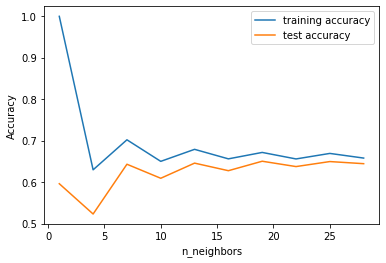

In [54]:
from sklearn.neighbors import KNeighborsClassifier
import time  # optional for timing the code

training_accuracy = []
test_accuracy = []
nNeighbors = range(1, 30, 3)

tic = time.perf_counter()  # timing start
for nNeighbor in nNeighbors:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=nNeighbor, n_jobs=-1)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
toc = time.perf_counter()  # timing end
print(f"Trained in in {toc - tic:0.4f} seconds")  # print the time elapsed

plt.plot(nNeighbors, training_accuracy, label="training accuracy")
plt.plot(nNeighbors, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()